Data Science Capstone Project: Manufacturing Equipment Output Prediction with Linear Regression

In [20]:
import pandas as pd
df = pd.read_csv('manufacturing_dataset_1000_samples.csv')
df.head()

,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [21]:
df.describe()

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
count,1000.000000,1000.000000,1000.00000,1000.00000,980.000000,980.000000,1000.000000,980.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,215.315900,116.075000,35.85170,11.92320,251.630714,22.941224,7.855900,30.795204,50.580000,1.885852,47.737000,0.192688,0.356844,29.298100
std,11.995507,14.667246,8.35349,2.30429,73.348695,2.773712,3.900798,27.684769,16.014558,0.274323,8.671153,0.173839,0.195610,11.955497
min,180.000000,80.000000,16.30000,8.00000,104.600000,18.000000,1.000000,1.000000,26.000000,1.286000,24.600000,0.006000,0.001000,5.000000
25%,207.200000,105.900000,28.80000,10.27500,200.900000,20.800000,4.700000,9.800000,45.000000,1.683750,41.000000,0.061000,0.193000,17.500000
50%,215.300000,115.950000,36.85000,11.90000,242.700000,22.900000,7.900000,22.100000,50.000000,1.849500,48.550000,0.139000,0.355500,28.200000
75%,222.800000,125.925000,45.00000,13.50000,295.300000,25.100000,11.100000,43.425000,55.000000,2.044250,55.300000,0.274000,0.520000,38.000000
max,300.000000,150.000000,60.00000,19.90000,1000.000000,28.000000,15.000000,120.000000,500.000000,2.843000,64.900000,0.840000,0.755000,68.600000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_Week                 1000 n

In [23]:
df.isnull().sum()

Timestamp                      0
Injection_Temperature          0
Injection_Pressure             0
Cycle_Time                     0
Cooling_Time                   0
Material_Viscosity            20
Ambient_Temperature           20
Machine_Age                    0
Operator_Experience           20
Maintenance_Hours              0
Shift                          0
Machine_Type                   0
Material_Grade                 0
Day_of_Week                    0
Temperature_Pressure_Ratio     0
Total_Cycle_Time               0
Efficiency_Score               0
Machine_Utilization            0
Parts_Per_Hour                 0
dtype: int64

In [24]:
#Timestamp is not directly useful for regression unless you extract features like hour, day, or month.Drop it or convert to useful time-based features.
df = df.drop(columns=['Timestamp'])
df.head()

,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [25]:
#Material_Viscosity (20 missing) #Ambient_Temperature (20 missing) #Operator_Experience (20 missing)
# fill missing values with mean or median
df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean(), inplace=True)
df['Ambient_Temperature'].fillna(df['Ambient_Temperature'].mean(), inplace=True)
df['Operator_Experience'].fillna(df['Operator_Experience'].median(), inplace=True)
df.isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15200\283415.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Material_Viscosity'].fillna(df['Material_Viscosity'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15200\283415.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Injection_Temperature         0
Injection_Pressure            0
Cycle_Time                    0
Cooling_Time                  0
Material_Viscosity            0
Ambient_Temperature           0
Machine_Age                   0
Operator_Experience           0
Maintenance_Hours             0
Shift                         0
Machine_Type                  0
Material_Grade                0
Day_of_Week                   0
Temperature_Pressure_Ratio    0
Total_Cycle_Time              0
Efficiency_Score              0
Machine_Utilization           0
Parts_Per_Hour                0
dtype: int64

In [26]:
#Shift (Day/Night/Evening) ,Machine_Type (Type_A, Type_B), Material_Grade (Economy, Standard, Premium),Day_of_Week (Monday–Sunday) Use One-Hot Encoding or Label Encoding.
df = pd.get_dummies(df, columns=['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week'], drop_first=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Injection_Temperature       1000 non-null   float64
 1   Injection_Pressure          1000 non-null   float64
 2   Cycle_Time                  1000 non-null   float64
 3   Cooling_Time                1000 non-null   float64
 4   Material_Viscosity          1000 non-null   float64
 5   Ambient_Temperature         1000 non-null   float64
 6   Machine_Age                 1000 non-null   float64
 7   Operator_Experience         1000 non-null   float64
 8   Maintenance_Hours           1000 non-null   int64  
 9   Temperature_Pressure_Ratio  1000 non-null   float64
 10  Total_Cycle_Time            1000 non-null   float64
 11  Efficiency_Score            1000 non-null   float64
 12  Machine_Utilization         1000 non-null   float64
 13  Parts_Per_Hour              1000 n

In [27]:
#Since linear regression is sensitive to feature scales, apply StandardScaler or MinMaxScaler to numerical features: Injection_Temperature, Injection_Pressure, Cycle_Time ,etc
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
numerical_features = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time']
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Material_Viscosity', 'Ambient_Temperature', 'Operator_Experience']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Temperature_Pressure_Ratio,...,Machine_Type_Type_B,Machine_Type_Type_C,Material_Grade_Premium,Material_Grade_Standard,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,0.341667,0.800000,0.283753,13.6,1.706789,1.843286,3.8,-0.708301,64,1.625,...,True,False,False,False,False,False,False,True,False,False
1,0.277500,0.698571,0.416476,14.0,-0.493710,-0.124333,6.8,-0.887005,58,1.655,...,False,False,False,True,False,False,False,False,False,True
2,0.356667,0.512857,0.082380,9.5,0.762931,0.859476,4.2,-0.766653,47,1.922,...,False,False,False,True,True,False,False,False,False,False
3,0.444167,0.361429,0.524027,13.1,-1.568468,1.114538,9.2,-0.803123,49,2.215,...,False,False,True,False,False,True,False,False,False,False
4,0.268333,0.650000,0.656751,9.9,0.641676,0.240041,6.2,-0.277951,49,1.691,...,True,False,True,False,True,False,False,False,False,False


In [28]:
#Define Target Variable
#Target: Parts_Per_Hour (hourly output)
X = df.drop(columns=['Parts_Per_Hour'])
y = df['Parts_Per_Hour']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 2.7178244238871296
MSE: 12.30535371276387
RMSE: 3.507898760335576
R²: 0.9057009350601306


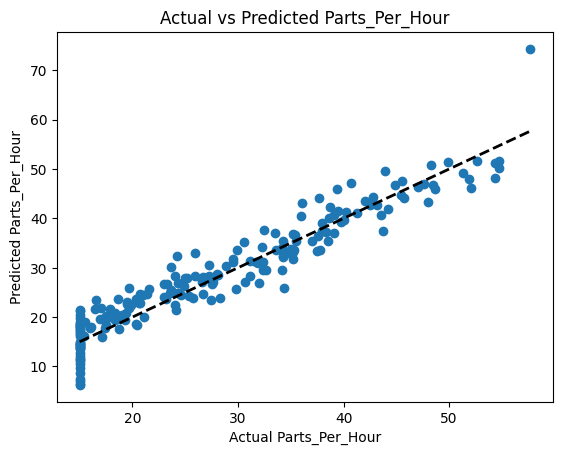

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Parts_Per_Hour")
plt.ylabel("Predicted Parts_Per_Hour")
plt.title("Actual vs Predicted Parts_Per_Hour")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()